In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew, norm

In [2]:
df = pd.read_csv('titanic_train.csv')
dftest = pd.read_csv('titanic_test.csv')

y = df.pop('Survived')

df['source'] = 'train'
dftest['source'] = 'test'

all_data = pd.concat([df, dftest])
source = all_data['source']
all_data = all_data.iloc[:,:-1]

In [3]:
print(all_data.shape)
print(df.shape)
print(dftest.shape)
print(y.shape)

(1309, 11)
(891, 12)
(418, 12)
(891,)


In [4]:
all_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [7]:
print(df.info())
print(dftest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
source         891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

In [8]:
Name = all_data.pop('Name')

In [9]:
## testing ML before feature engeenering
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

ss = StandardScaler()
model_test = LogisticRegression()
imputation = Imputer()

test = all_data.iloc[:891,:]
test = pd.get_dummies(test)

pipeline_test = make_pipeline(imputation, ss, model_test)

xtrain_test, xtest_test, ytrain_test, ytest_test = train_test_split(test, y, test_size=0.3)


cross_score_test = cross_val_score(pipeline_test, xtrain_test, ytrain_test, cv=5)

pipeline_test.fit(xtrain_test, ytrain_test)

predtest_test = pipeline_test.predict(xtest_test)

print(cross_score_test.mean())
print(accuracy_score(ytest_test, predtest_test))

0.8041677419354839
0.8171641791044776


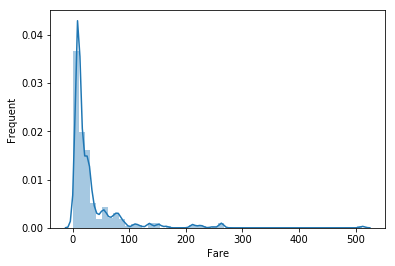

In [10]:
sns.distplot(all_data.Fare.dropna())
plt.xlabel('Fare')
plt.ylabel('Frequent')
plt.show()


In [11]:
all_data.loc[all_data.Fare>100, 'Fare'] = 100


In [12]:
all_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,27.280160
std,378.020061,0.837836,14.413493,1.041658,0.865560,27.603825
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,100.000000


In [13]:
import re

all_data['Fam_Size'] = all_data.Parch + all_data.SibSp
all_data['title'] = Name.apply(lambda x : re.search('([A-Z][a-z]+)\.', x).group(1))
all_data['CatAge'] = pd.qcut(all_data.Age, q=4, labels=False)
all_data.Fare = np.floor(all_data.Fare/10)

all_data = all_data.drop(['Parch', 'SibSp', 'Ticket','Age'], axis=1)

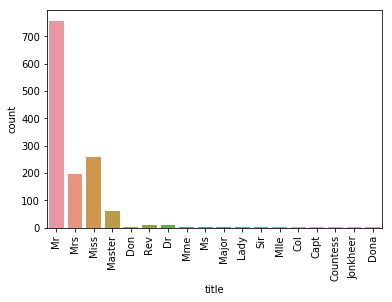

In [14]:
sns.countplot(all_data.title)
plt.xticks(rotation=90)
plt.show()

In [47]:
all_data.title= all_data.title.replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt',
                                       'Countess', 'Jonkheer', 'Dona'], 'Other')

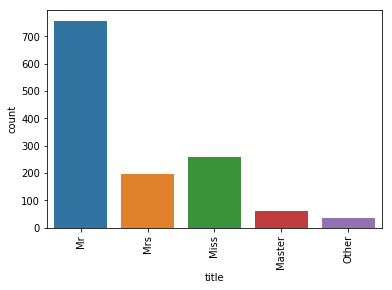

In [48]:
sns.countplot(all_data.title)
plt.xticks(rotation=90)
plt.show()

In [49]:
all_data.head()

,PassengerId,Pclass,Sex,Fare,Cabin,Embarked,Fam_Size,title,CatAge
0,1,3,male,0.0,NaN,S,1,Mr,1.0
1,2,1,female,7.0,C85,C,1,Mrs,2.0
2,3,3,female,0.0,NaN,S,0,Miss,1.0
3,4,1,female,5.0,C123,S,1,Mrs,2.0
4,5,3,male,0.0,NaN,S,0,Mr,2.0


In [50]:
all_data = all_data.drop(['PassengerId', 'Cabin'], axis=1)
all_data.isnull().sum()

Pclass        0
Sex           0
Fare          1
Embarked      2
Fam_Size      0
title         0
CatAge      263
dtype: int64

In [51]:
print(all_data.Embarked.value_counts())

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [52]:
all_data.Embarked = all_data.Embarked.fillna('S')
all_data.Fare = all_data.Fare.fillna(14.4542)

In [53]:
from scipy.stats import mode

mode_age_title = all_data.pivot_table(values='CatAge', columns='title',aggfunc=(lambda x:mode(x).mode[0]))

miss_bool = all_data.CatAge.isnull()

all_data.loc[miss_bool, 'CatAge'] = all_data.loc[miss_bool, 'title'].apply(lambda x : mode_age_title[x])

In [54]:
all_data.isnull().sum()

Pclass      0
Sex         0
Fare        0
Embarked    0
Fam_Size    0
title       0
CatAge      0
dtype: int64

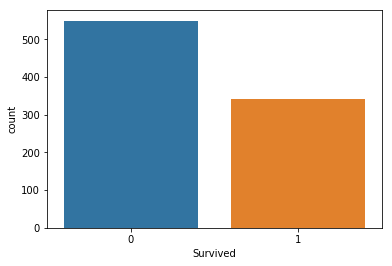

In [55]:
sns.countplot(y)
plt.show()

Decision Tree and Logistic Regression

In [263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

data_dummis = pd.get_dummies(all_data)
feature_name = data_dummis.columns
data_dummis = ss.fit_transform(data_dummis)
x_train, x_test, y_train, y_test = train_test_split(data_dummis[:891,:], y, test_size=0.3, random_state=21, stratify = y)

LRmod = LogisticRegression()
params = {'C':np.logspace(-5, 8, 15), 'penalty':['l1', 'l2']}

LRsearch = GridSearchCV(LRmod, params, cv=5, scoring='roc_auc')

In [264]:
LRsearch.fit(x_train, y_train)
print(LRsearch.best_params_)
print(LRsearch.best_score_)

{'C': 0.4393970560760795, 'penalty': 'l1'}
0.8711571134755899


In [265]:
LR_pred_prob = LRsearch.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test, LR_pred))

0.8722565460429538


In [266]:
#test report
LR_pred_bin = LRsearch.predict(x_test)

print(classification_report(y_test, LR_pred_bin))
print(confusion_matrix(y_test, LR_pred_bin))

print("="*80)

LR_train_pred = LRsearch.predict(x_train)
print(classification_report(y_train, LR_train_pred))
print(confusion_matrix(y_train, LR_train_pred))

             precision    recall  f1-score   support

          0       0.83      0.92      0.87       165
          1       0.84      0.69      0.76       103

avg / total       0.83      0.83      0.82       268

[[151  14]
 [ 32  71]]
             precision    recall  f1-score   support

          0       0.86      0.87      0.86       384
          1       0.79      0.77      0.78       239

avg / total       0.83      0.83      0.83       623

[[335  49]
 [ 56 183]]


In [267]:
print(LRsearch.score(x_train, y_train))

0.8789552824267782


In [268]:
from scipy.stats import randint

np.random.seed(21)

dt_mod = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 'min_samples_split': np.arange(2, 150), "min_samples_leaf":randint(1,10), 
         'max_depth':randint(1,9), 'max_features':randint(1,10)}

dtsearch = RandomizedSearchCV(dt_mod, params, cv=5, scoring='roc_auc')

dtsearch.fit(x_train, y_train)

print(dtsearch.best_params_)
print(dtsearch.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 9, 'min_samples_leaf': 5, 'min_samples_split': 50}
0.8578349673303695


In [269]:
print(dtsearch.score(x_train, y_train))

0.8773916928172942


In [270]:
#tree report 
dttest_pred = dtsearch.predict(x_test)
dttrain_pred =dtsearch.predict(x_train)

print(roc_auc_score(y_test, dttest_pred))
print(roc_auc_score(y_train, dttrain_pred))

print(confusion_matrix(y_test, dttest_pred))
print(confusion_matrix(y_train, dttrain_pred))
print("="*80)
print(classification_report(y_test, dttest_pred))
print(classification_report(y_train, dttrain_pred))

0.7300088261253309
0.7608470624128312
[[156   9]
 [ 50  53]]
[[361  23]
 [100 139]]
             precision    recall  f1-score   support

          0       0.76      0.95      0.84       165
          1       0.85      0.51      0.64       103

avg / total       0.79      0.78      0.76       268

             precision    recall  f1-score   support

          0       0.78      0.94      0.85       384
          1       0.86      0.58      0.69       239

avg / total       0.81      0.80      0.79       623



In [271]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(21)
random_forest = RandomForestClassifier()
params = {'n_estimators': np.arange(25, 150), 'criterion':['gini', 'entropy'], 'min_samples_split': np.arange(2, 150),
          "min_samples_leaf":randint(1,10), 
         'max_depth':randint(1,9), 'max_features':randint(1,10)}

search_random_forest = RandomizedSearchCV(random_forest, params, cv=5, scoring='roc_auc')

search_random_forest.fit(x_train, y_train)

print(search_random_forest.best_params_)
print(search_random_forest.best_score_)
print(search_random_forest.score(x_train, y_train))

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 9, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 137}
0.8709884080398392
0.8966505404463041


In [272]:
y_pred_train = search_random_forest.predict(x_train)
y_pred_test = search_random_forest.predict(x_test)

print(roc_auc_score(y_train, y_pred_train))
print(roc_auc_score(y_test, y_pred_test))

print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

0.8179317032775454
0.7985878199470433
[[347  37]
 [ 64 175]]
[[153  12]
 [ 34  69]]
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       384
          1       0.83      0.73      0.78       239

avg / total       0.84      0.84      0.84       623

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       165
          1       0.85      0.67      0.75       103

avg / total       0.83      0.83      0.82       268



In [276]:
RF = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 9, min_samples_leaf= 5, min_samples_split= 50, n_estimators= 137)
RF.fit(data_dummis[:891,:], y)

DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, max_features= 9, min_samples_leaf= 5, min_samples_split= 50)
DT.fit(data_dummis[:891,:],y)

export_graphviz(DT, out_file='titanic_tree.dot', 
                         feature_names=feature_name,  
                         class_names=['Dead', 'Survive'],  
                         filled=True, rounded=True)  

In [278]:
y_predRF = RF.predict(data_dummis[:891,:])

print(roc_auc_score(y, y_predRF))

print(confusion_matrix(y, y_predRF))

print(classification_report(y, y_predRF))

0.8153820343207746
[[502  47]
 [ 97 245]]
             precision    recall  f1-score   support

          0       0.84      0.91      0.87       549
          1       0.84      0.72      0.77       342

avg / total       0.84      0.84      0.84       891



In [280]:
y_predDT = DT.predict(data_dummis[:891,:])

print(roc_auc_score(y, y_predDT))

print(confusion_matrix(y, y_predDT))

print(classification_report(y, y_predDT))

0.7879637618636757
[[504  45]
 [117 225]]
             precision    recall  f1-score   support

          0       0.81      0.92      0.86       549
          1       0.83      0.66      0.74       342

avg / total       0.82      0.82      0.81       891



In [283]:
LR = LogisticRegression(C= 3.727593720314938, penalty= 'l1')

LR.fit(data_dummis[:891,:], y)

y_LR = LR.predict(data_dummis[:891,:]) 
y_LR_prob = LR.predict_proba(data_dummis[:891,:])[:,1]

print(roc_auc_score(y, y_LR))

print(roc_auc_score(y, y_LR_prob))

print(confusion_matrix(y, y_LR))

print(classification_report(y, y_LR))

0.8101332566388648
0.8774406416770523
[[485  64]
 [ 90 252]]
             precision    recall  f1-score   support

          0       0.84      0.88      0.86       549
          1       0.80      0.74      0.77       342

avg / total       0.83      0.83      0.83       891



In [285]:
print(RF.score(data_dummis[:891,:], y))
print(DT.score(data_dummis[:891,:], y))
print(LR.score(data_dummis[:891,:], y))

0.8383838383838383
0.8181818181818182
0.8271604938271605


In [294]:
y_sub_RF = RF.predict(data_dummis[891:,:])

submission = pd.DataFrame(list(zip(dftest.PassengerId, y_sub)), columns=['PassengerId', 'Survived'])

In [308]:
y_sub_LR =LR.predict(data_dummis[891:,:])
sub.Survived = y_sub_LR

In [295]:
sub.Survived = y_sub_RF


In [290]:
LR.coef_.reshape(14,)

array([-0.76436031,  0.2734927 , -0.75633338, -0.27597091,  1.32623197,
       -0.49231655,  0.10845743,  0.        , -0.08056259,  0.76393544,
       -0.33854616,  0.        ,  0.        ,  0.        ])

In [291]:
LR.coef_.shape

(1, 14)

In [310]:
sub.to_csv('LR_titanic_submission_real.csv', index=False)

<Container object of 14 artists>

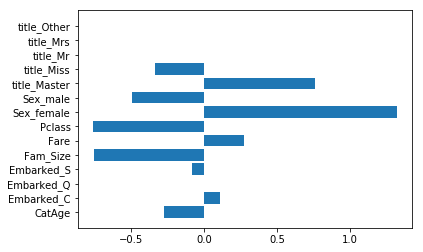

In [299]:
plt.barh(feature_name, LR.coef_.reshape(14,))

In [302]:
RF.feature_importances_

array([0.17163944, 0.07890547, 0.08590965, 0.02412176, 0.13249836,
       0.14977675, 0.00825965, 0.00753616, 0.01277585, 0.02461939,
       0.00306664, 0.28103504, 0.00422948, 0.01562637])

<Container object of 14 artists>

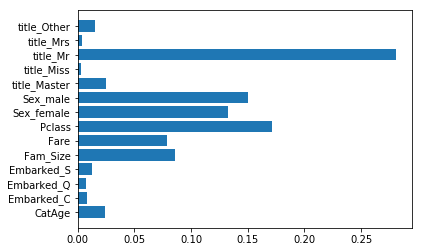

In [305]:
plt.barh(feature_name, RF.feature_importances_.reshape(14,))